In [57]:
import pandas as pd
import pyxlsb as pxl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
blood_pressure = pd.read_sas('data/blood-pressure.XPT')
body_measure = pd.read_sas('data/body-measure.XPT')
demographic_var = pd.read_sas('data/demographic-variables.XPT')

In [3]:
merge_dfs = pd.merge(blood_pressure, body_measure, on='SEQN')
df = pd.merge(merge_dfs, demographic_var, on ='SEQN')

In [4]:
df = df[["RIDAGEYR", "BMXBMI", "BPXSY1"]]
df.head()

,RIDAGEYR,BMXBMI,BPXSY1
0,62.0,27.8,128.0
1,53.0,30.8,146.0
2,78.0,28.8,138.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0


In [32]:
df.rename(columns={'RIDAGEYR': 'age', 'BMXBMI': 'IMC', "BPXSY1": "PAS"}, inplace=True)
df = df[(df['age']>20) & (df['age']<60)]
df

C:\Users\larys\AppData\Local\Temp\ipykernel_6016\4179470857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'RIDAGEYR': 'age', 'BMXBMI': 'IMC', "BPXSY1": "PAS"}, inplace=True)


,age,IMC,PAS
1,53.0,30.8,146.0
3,56.0,42.4,132.0
4,42.0,20.3,100.0
9,22.0,28.0,110.0
10,32.0,28.2,120.0
...,...,...,...
9531,32.0,32.9,112.0
9532,25.0,21.0,112.0
9537,26.0,33.8,118.0
9541,35.0,26.0,104.0


Base de comparação IMC e PAS

In [89]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_error, mean_squared_error

In [90]:
base = df[['IMC','PAS']]
base = base.fillna(base.mean())


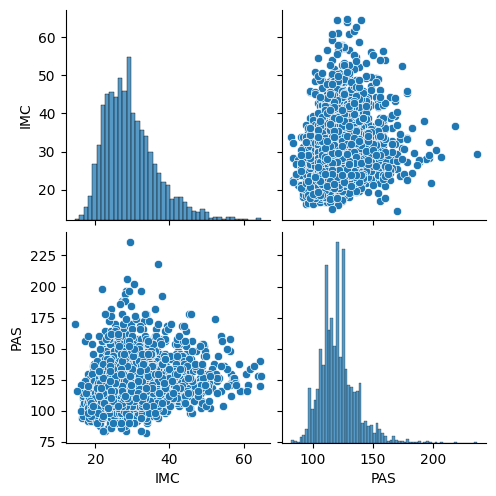

In [91]:
sns.pairplot(base)

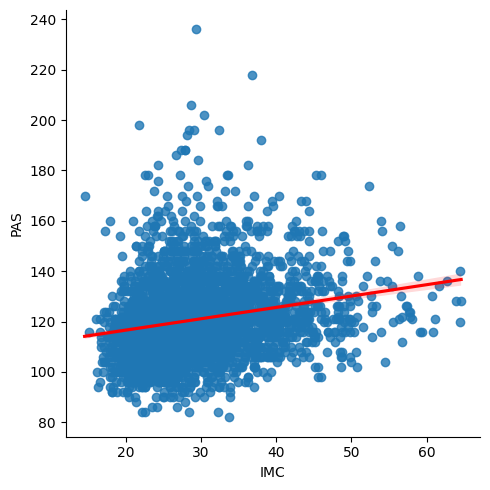

In [61]:
sns.lmplot(base, x='IMC', y='PAS', line_kws={'color':'red'})

In [92]:
base.corr()

,IMC,PAS
IMC,1.00000,0.21477
PAS,0.21477,1.00000


In [93]:
X = base.iloc[:,0].values # IMC
y = base.iloc[:,1].values # PAS
X = X.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=124)

In [94]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
 

LinearRegression()

In [95]:
y_pred = modelo.predict(X_test)


Avaliação de performace do modelo

In [96]:
r2 = r2_score(y_test, y_pred)
# medida de diferença absoluta entre os valores reais e os previstos; quanto menor, melhor a performance
mae = mean_absolute_error(y_test, y_pred)
# medida dos quadrados das diferenças entre os valores reais e os previstos
mse = mean_squared_error(y_test, y_pred)
# raiz do MSE, representa a magnitude média do erro; quanto menor melhor a performance
rmse = np.sqrt(mse)

print("R²: {:.3f}".format(r2))
print("MAE: {:.3f}".format(mae))
print("MSE: {:.3f}".format(mse))
print("RMSE: {:.3f}".format(rmse))

R²: 0.049
MAE: 11.176
MSE: 237.861
RMSE: 15.423


In [82]:
imc_x = 25
imc_x = np.array(imc_x).reshape(1, -1)
previsao = linear.predict(imc_x)
print('Valor estimado para o PAS:', previsao)

Valor estimado para o PAS: [119.15483635]
